## List comprehension

Just think of it as a one-line way to create a list from another list.

Here it is adding a one to each number of `my_list` and storing the results in `compre_list`

In [1]:
my_list = [1,2,3,4,5]

compre_list = [blah**2+10 for blah in my_list]

print(compre_list)

[11, 14, 19, 26, 35]


In [3]:
my_list = ['mendoza', 'tepper', 'mendoza','tepper','tepper','tepper','mendoza']

mendoza_indicator = [1 if var=='mendoza' else 0 for var in my_list]

print(my_list)
print(mendoza_indicator)

['mendoza', 'tepper', 'mendoza', 'tepper', 'tepper', 'tepper', 'mendoza']
[1, 0, 1, 0, 0, 0, 1]


## Activity (ICA Titanic)

Find the number of females in the list below using list comprehension

1. First create a list with female indicator, that is, 1 if the element is female and 0 otherwise
2. Then the number of females is just the sum of elements of this new list. 


In [5]:
gender_list = ['female','female','male','male','female','female','male','male']

# Step 1:
gender_ind = [1 if var == 'female' else 0 for var in gender_list]
print(gender_ind)
# Step 2:
print(sum(gender_ind))

[1, 1, 0, 0, 1, 1, 0, 0]
4


# NumPy - Numerical Python 

## Importing numpy array

In [6]:
import numpy as np
np.__version__

'1.20.1'

Note: Some of the examples and content are from our text book PDSH Ch. 2

## Fundamentals of NumPy Arrays


### Creating NumPy array from a list

In [7]:
list_of_ints = [0, 1, 2, 3, 4, 5]
np.array(list_of_ints)

array([0, 1, 2, 3, 4, 5])

### Creating NumPy array from scratch

In [8]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
np.full(10, 3.1415)

array([3.1415, 3.1415, 3.1415, 3.1415, 3.1415, 3.1415, 3.1415, 3.1415,
       3.1415, 3.1415])

In [10]:
np.arange(5,25, 5)

array([ 5, 10, 15, 20])

In [12]:
np.arange?

## Accessing NumPy Array

In the last two classes we have used Python's built-in `list` and now we are using array type provided by the NumPy package. 

<div class="alert alert-block alert-info">
The actual name of the NumPy array type is `ndarray`. So, when we refer to a Numpy Array or an `ndarray` we are talking about the same thing.</div> 

Another similiarity between the two types is how you can retrieve the data elements they contain.

For either type, you can access an element by simple adding brackets to the end of the object name with the index of the element you want inside the bracket.

<div class="alert alert-block alert-warning">
Just remember the index of the first element if `0`, not `1`. Forget this and you'll have all sorts of problems.
</div> 


In [13]:
numeric_array = np.array(range(1, 11))

In [14]:
numeric_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [15]:
numeric_array[10]

IndexError: index 10 is out of bounds for axis 0 with size 10

In [16]:
numeric_array[5]

6

In [17]:
numeric_array[0]

1

In [18]:
numeric_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [19]:
numeric_array[3:8]

array([4, 5, 6, 7, 8])

### Similar to lists you can also access them from the end using negative indexing

In [20]:
numeric_array[-1]

10

## Array Slicing: Accessing Subarrays <a name="slicing"></a>

Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the *slice* notation. 

The NumPy slicing syntax follows that of the standard Python `list`; to access a slice of an array `x`, use the `start:stop:step` notation inside of brackets:
``` python
x[start:stop:step]
```

If any of these are unspecified, they default to the values: 
* `start=0`
* `stop=`*`size of the dimension or size of the array`*
* `step=1`.

#### Sample Slice Notations
Here are some sample slice notations and their meanings.
* `1:5:1`: Return elements 2 through 5 in normal order. (Remember that with 0-based indexing, 1 is the second element.)
* `:8:1`: Return elements 0 through 8 in normal order. Since the `start` parameter is left out, it assumes it's default value.
* `::-1`: Return all elements (first two parameters are default values) in reserve order.

Let's try slice notations

In [21]:
numeric_array = np.array(range(1, 11))

In [22]:
numeric_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [23]:
# Return everything up to the 4th element
numeric_array[:4]

array([1, 2, 3, 4])

In [24]:
numeric_array[3:8:2]

array([4, 6, 8])

In [25]:
numeric_array[::-1]

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

## `ndarray` Slices are Segments, not Copies <a name="subcopy"></a>

When we use slice notation on an `ndarray`, it returns a segment of the original - as opposed to a copy. This means that if you change the elements of a slice, you will also change them in the original array.

<div class="alert alert-block alert-danger">
It is very important for experienced Python programmers to note since this is the opposite of what happens when you slice a `list` object.
</div> 

While this may seem like a bad thing at first, particular for those of use who are used to slicing `list` objects, this can actually help us when we want to process little chuncks of data at a time.

Let's demonstrate:

In [27]:
numeric_array = np.random.randint(100, size=10)  
numeric_array

array([55, 12, 44, 35,  9, 79, 55, 27, 73, 52])

In [28]:
part_of_it = numeric_array[3:6]
part_of_it

array([35,  9, 79])

In [29]:
part_of_it[2] = 2000

part_of_it

array([  35,    9, 2000])

In [30]:
# And re-output `numeric_array`
numeric_array

array([  55,   12,   44,   35,    9, 2000,   55,   27,   73,   52])

### Forcing an Array's Data Type
You also have the option of forcing all NumPy array elements to have a specific data type.  Here I'll take a `list` of `float` objects and coerce them into `int` objects by specifying the **`dtype`** parameter on the `np.array` function.

In [31]:
list_of_floats = [11.2, 57.6, 95.1]
np.array(list_of_floats, dtype=int)

array([11, 57, 95])

<div class="alert alert-block alert-info">
<p>The <code>dtype</code> parameter can take many different values in additional these standard Python types: <code>int, float, bool, complex</code>.</p>

<p>For a complete list, you can visit <a href="https://docs.scipy.org/doc/numpy/user/basics.types.html" target="_blank">NumPy website.</a>
</div>

## NumPy Array Attributes
Like all objects, NumPy Arrays have a set of attributes. Let's take moment to discuss some that you may find particularly helpful:

1. `ndim`
1. `shape`
1. `size`
1. `dtype`

To get started, let's create 3 arrays.

In [32]:
x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

print("One Dimensional Array", x1, sep='\n')
print("Two Dimensional Array", x2, sep='\n')
print("Three Dimensional Array", x3, sep='\n')

One Dimensional Array
[5 9 4 6 6 1]
Two Dimensional Array
[[1 1 9 0]
 [9 8 9 8]
 [3 6 8 1]]
Three Dimensional Array
[[[7 4 7 3 4]
  [4 2 8 8 4]
  [5 6 2 2 9]
  [3 2 3 0 8]]

 [[2 0 8 4 8]
  [1 8 2 3 0]
  [5 7 0 7 5]
  [9 3 9 4 9]]

 [[1 9 5 4 9]
  [5 8 7 7 7]
  [5 9 4 3 0]
  [9 3 0 6 1]]]


### `ndim` Attribute
Returns the number of dimensions a given array has.

In [33]:
print(x1.ndim, x2.ndim, x3.ndim)

1 2 3


### `shape` Attribute
Returns the number of elements a given dimension has. For our `x2` array we'd get this output:

```python
x2.shape
(3, 4)
```

If you look above, you'll see that the full represenation of our `x2` array was like this:

```
[[6 7 9 1]
 [3 4 1 2]
 [6 7 0 7]]
```

The `(3, 4)` returned by `x2.shape` is referring to the fact that our array had three "rows" and four "columns" in each row.

In [34]:
print(x2)
print(x2.shape)

[[1 1 9 0]
 [9 8 9 8]
 [3 6 8 1]]
(3, 4)


In [35]:
row,col = x2.shape
print(row)
print(col)

3
4


### `size` Attribute
Returns the total number of elements across all dimensions of an array.

So, for our one-dimensional array `size` will be 6.  
For our 2 dimensional array had dimensions of 3 & 4 elements, so `size` will be 12.  
Our 3 dimensional array had dimensions of 3, 4, and 5. Therefore it will have a total size of 60 elements.

In [36]:
print("x1 size:", x1.size)
print("x2 size:", x2.size)
print("x3 size:", x3.size)

x1 size: 6
x2 size: 12
x3 size: 60


### `dtype` Attribute
Previously, we passed a `dtype` argument to the `np.array` constructor function to coerce the data type of the array's elements.

It comes about again here, but this time as an attribute of all NumPy array's. Unsurprisingly, it tells you the data type of the objects held inside the array.

In [37]:
float_array = np.array([1, 2, 3.1])
float_array.dtype

dtype('float64')

In [38]:
float_array

array([1. , 2. , 3.1])

In [39]:
float_array = np.array([1, 2, 3])
float_array.dtype

dtype('int32')

### `itemsize` and `nbytes` Attributes
Other attributes include ``itemsize``, which lists the size (in bytes) of each array element, and ``nbytes``, which lists the total size (in bytes) of the array:

In [40]:
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

itemsize: 4 bytes
nbytes: 240 bytes


In general, we expect that ``nbytes`` is equal to ``itemsize`` times ``size``.

# NumPy Array Sorting, Merging, Splitting and Reshaping

## ND Football roster data

The Notre Dame football athletes information is a publicly accessible data that provides information about the athletes, their jersey number, name, position, height, weight, class and hometown. 

To get start, we will work with an array of football player weights from your tutorial dataset.

In [41]:
# We will understand each of the packages in the course as we move along, for now let us import them
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

### Make sure this Jupyter file 'Lecture_8_Intro_Numpy_Sep_16.ipynb' and the 'data' folder are in the same folder (Class Jupyter). Also make sure the 'data' folder contains the data file 'nd-football-2021-roster.csv' downloaded from Sakai (or Google drive) 

In [59]:
# At this point you don't have to know the details of following data loading. 
# However, understand that it is loading the weights of all the athletes
nd_player_weights = np.array(pd.read_csv('./data/nd-football-2021-roster.csv')['Weight'])

## Activity:

Compute the following details

* Number of players in the dataset
* The average weight of the players
* The weight of the lightest player
* The weight of the heaviest player

In [43]:
len(nd_player_weights)

113

In [44]:
nd_player_weights.size

113

In [45]:
np.mean(nd_player_weights)

230.57522123893804

In [46]:
nd_player_weights.mean()

230.57522123893804

In [48]:
nd_player_weights.mean()

230.57522123893804

In [49]:
nd_player_weights.min()

174

In [50]:
nd_player_weights.max()

335

## Array Sorting
A very common use case for real world datasets is that they aren't going to be sorted in the ways we want. This is the case with our football player weights array.  Take a look at the messy order it is in right now.

In [51]:
nd_player_weights

array([207, 227, 225, 223, 215, 200, 225, 210, 206, 215, 201, 194, 190,
       199, 215, 200, 182, 202, 195, 176, 181, 203, 174, 179, 199, 195,
       215, 195, 195, 240, 235, 250, 251, 252, 247, 305, 307, 290, 313,
       305, 295, 306, 335, 287, 295, 310, 310, 305, 307, 290, 315, 310,
       280, 248, 248, 275, 255, 230, 257, 245, 300, 312, 210, 275, 283,
       289, 250, 289, 225, 268, 233, 230, 232, 230, 222, 210, 229, 222,
       217, 228, 225, 233, 228, 182, 177, 190, 205, 190, 191, 193, 192,
       202, 205, 183, 193, 200, 195, 204, 219, 190, 185, 195, 185, 188,
       185, 197, 196, 183, 197, 210, 210, 202, 230], dtype=int64)

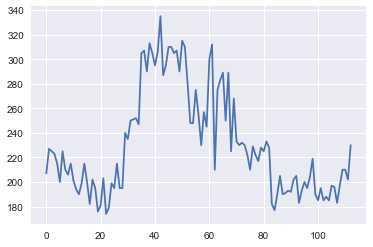

In [52]:
# And look how that would be visualized...You don't have to know the details!
plt.axes().plot(nd_player_weights)

### np.sort
The `np.sort` function returns a sorted copy of an array. Let's go ahead and use that to get a sorted version of our player's weights.

In [53]:
sorted_player_weights = np.sort(nd_player_weights)
print(sorted_player_weights)

[174 176 177 179 181 182 182 183 183 185 185 185 188 190 190 190 190 191
 192 193 193 194 195 195 195 195 195 195 196 197 197 199 199 200 200 200
 201 202 202 202 203 204 205 205 206 207 210 210 210 210 210 215 215 215
 215 217 219 222 222 223 225 225 225 225 227 228 228 229 230 230 230 230
 232 233 233 235 240 245 247 248 248 250 250 251 252 255 257 268 275 275
 280 283 287 289 289 290 290 295 295 300 305 305 305 306 307 307 310 310
 310 312 313 315 335]


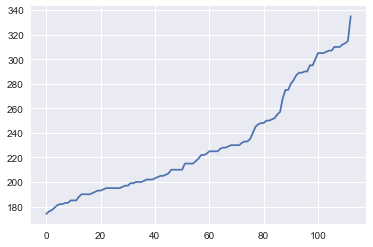

In [54]:
axes = plt.axes()
axes.plot(sorted_player_weights)

<div class="alert alert-block alert-info">
<p>You can also sort an array by calling the `sort` method on the array itself. For example, `nd_player_weights.sort()` would also get you a sorted list.</p>
<p>There is one important difference however. If you call `sort` on the array itself like this, it sorts the array **"in-place"**. This means that the original array elements are rearranged. Using `np.sort` on the other hand returns a new sorted copy of the original array.
</p>
</div> 

In [55]:
nd_player_weights

array([207, 227, 225, 223, 215, 200, 225, 210, 206, 215, 201, 194, 190,
       199, 215, 200, 182, 202, 195, 176, 181, 203, 174, 179, 199, 195,
       215, 195, 195, 240, 235, 250, 251, 252, 247, 305, 307, 290, 313,
       305, 295, 306, 335, 287, 295, 310, 310, 305, 307, 290, 315, 310,
       280, 248, 248, 275, 255, 230, 257, 245, 300, 312, 210, 275, 283,
       289, 250, 289, 225, 268, 233, 230, 232, 230, 222, 210, 229, 222,
       217, 228, 225, 233, 228, 182, 177, 190, 205, 190, 191, 193, 192,
       202, 205, 183, 193, 200, 195, 204, 219, 190, 185, 195, 185, 188,
       185, 197, 196, 183, 197, 210, 210, 202, 230], dtype=int64)

In [56]:
nd_player_weights.sort()
print(nd_player_weights)

[174 176 177 179 181 182 182 183 183 185 185 185 188 190 190 190 190 191
 192 193 193 194 195 195 195 195 195 195 196 197 197 199 199 200 200 200
 201 202 202 202 203 204 205 205 206 207 210 210 210 210 210 215 215 215
 215 217 219 222 222 223 225 225 225 225 227 228 228 229 230 230 230 230
 232 233 233 235 240 245 247 248 248 250 250 251 252 255 257 268 275 275
 280 283 287 289 289 290 290 295 295 300 305 305 305 306 307 307 310 310
 310 312 313 315 335]


In [57]:
## THIS SHOULD NOT BE DONE
# nd_player_weights = nd_player_weights.sort()
# nd_player_weights

In [62]:
# At this point you don't have to know the details of following data loading. 
# However, understand that it is loading the weights of all the athletes
nd_player_weights = np.array(pd.read_csv('./data/nd-football-2021-roster.csv')['Weight'])
nd_player_weights

array([207, 227, 225, 223, 215, 200, 225, 210, 206, 215, 201, 194, 190,
       199, 215, 200, 182, 202, 195, 176, 181, 203, 174, 179, 199, 195,
       215, 195, 195, 240, 235, 250, 251, 252, 247, 305, 307, 290, 313,
       305, 295, 306, 335, 287, 295, 310, 310, 305, 307, 290, 315, 310,
       280, 248, 248, 275, 255, 230, 257, 245, 300, 312, 210, 275, 283,
       289, 250, 289, 225, 268, 233, 230, 232, 230, 222, 210, 229, 222,
       217, 228, 225, 233, 228, 182, 177, 190, 205, 190, 191, 193, 192,
       202, 205, 183, 193, 200, 195, 204, 219, 190, 185, 195, 185, 188,
       185, 197, 196, 183, 197, 210, 210, 202, 230], dtype=int64)

In [63]:
nd_player_weights.sort()

In [64]:
nd_player_weights

array([174, 176, 177, 179, 181, 182, 182, 183, 183, 185, 185, 185, 188,
       190, 190, 190, 190, 191, 192, 193, 193, 194, 195, 195, 195, 195,
       195, 195, 196, 197, 197, 199, 199, 200, 200, 200, 201, 202, 202,
       202, 203, 204, 205, 205, 206, 207, 210, 210, 210, 210, 210, 215,
       215, 215, 215, 217, 219, 222, 222, 223, 225, 225, 225, 225, 227,
       228, 228, 229, 230, 230, 230, 230, 232, 233, 233, 235, 240, 245,
       247, 248, 248, 250, 250, 251, 252, 255, 257, 268, 275, 275, 280,
       283, 287, 289, 289, 290, 290, 295, 295, 300, 305, 305, 305, 306,
       307, 307, 310, 310, 310, 312, 313, 315, 335], dtype=int64)

## Activity: 

Print the weights of five lowest weights and five highest weights

**NOTE**: The player weights are already sorted in the above step

In [65]:
nd_player_weights[:5]

array([174, 176, 177, 179, 181], dtype=int64)

In [66]:
nd_player_weights[-5:]

array([310, 312, 313, 315, 335], dtype=int64)

### Activity on heights

* Tallest Height
* Shortest Height
* 3 Tallest Heights
* 3 Shortest Heights

In [67]:
nd_player_heights = np.array(pd.read_csv('./data/nd-football-2021-roster.csv')['Height'])
nd_player_heights

array([73, 76, 73, 75, 74, 71, 73, 73, 71, 71, 71, 71, 69, 69, 74, 76, 70,
       71, 72, 70, 71, 73, 72, 71, 72, 73, 73, 71, 73, 76, 75, 77, 76, 78,
       78, 79, 80, 77, 78, 77, 75, 77, 78, 77, 77, 78, 74, 77, 76, 73, 76,
       77, 75, 73, 74, 72, 78, 72, 77, 77, 73, 75, 73, 73, 77, 77, 75, 77,
       76, 74, 74, 73, 74, 72, 73, 73, 74, 71, 73, 75, 73, 74, 72, 73, 70,
       67, 74, 73, 70, 71, 73, 71, 72, 71, 72, 72, 73, 72, 76, 72, 69, 68,
       70, 72, 71, 75, 70, 71, 73, 74, 73, 72, 74], dtype=int64)

In [68]:
nd_player_heights.max()

80

In [69]:
nd_player_heights.min()

67

In [70]:
nd_player_heights.sort()
nd_player_heights[-3:]

array([78, 79, 80], dtype=int64)

In [71]:
nd_player_heights[:3]

array([67, 68, 69], dtype=int64)

## Array Merging
Now that we've discussed how to split arrays apart, let's explore how we can piece multiple arrays together with the `np.concatenate` functions. 

### `np.concatenate`


For some reason, the weight information for the football team has been send to you in two different emails. Now, you've got 2 separate arrays that you need to put together in order to generate the correct statistics for the team.

In [72]:
# Here are your two arrays
# One has 25 data points and the other has the remaining 91
nd_player_weights_1 = nd_player_weights[:25]
nd_player_weights_2 = nd_player_weights[25:]
print(len(nd_player_weights_1), len(nd_player_weights_2))

25 88


In [73]:
# It is super easy to concatenate them together with `np.concatenate`
merged_array = np.concatenate([nd_player_weights_1, nd_player_weights_2])
print(len(merged_array))

113


## Array Splitting

Now let's turn our attention to how we can split arrays into smaller chuncks using the `np.split`, `np.array_split`, `np.hsplit`, and `np.vsplit` functions.

### `np.split`

In [74]:
# You can split a single dimensional array with `np.split` 
# by specifying the index values on which to split the array.

# Here we will use it to split the array into 5 arrays. 
np.split(nd_player_weights, indices_or_sections=[10, 30, 60, 70, 80])

[array([174, 176, 177, 179, 181, 182, 182, 183, 183, 185], dtype=int64),
 array([185, 185, 188, 190, 190, 190, 190, 191, 192, 193, 193, 194, 195,
        195, 195, 195, 195, 195, 196, 197], dtype=int64),
 array([197, 199, 199, 200, 200, 200, 201, 202, 202, 202, 203, 204, 205,
        205, 206, 207, 210, 210, 210, 210, 210, 215, 215, 215, 215, 217,
        219, 222, 222, 223], dtype=int64),
 array([225, 225, 225, 225, 227, 228, 228, 229, 230, 230], dtype=int64),
 array([230, 230, 232, 233, 233, 235, 240, 245, 247, 248], dtype=int64),
 array([248, 250, 250, 251, 252, 255, 257, 268, 275, 275, 280, 283, 287,
        289, 289, 290, 290, 295, 295, 300, 305, 305, 305, 306, 307, 307,
        310, 310, 310, 312, 313, 315, 335], dtype=int64)]

<div class="alert alert-block alert-info">
<p>It is important to note that the index values you provide will become the first element of the new arrays rather than the last element of the previous split.</p> 
<p>So, in this case, the elements at indexes 10, 30, 60, 70, 80 become the first elements of the new arrays.</p>
</div> 

### `np.array_split`

In [75]:
# If you want to split an array into equal parts 
# (or a close to equal as possible), use `np.array_split`

# Here we will divided our team into 6 parts.
np.array_split(nd_player_weights, 6)

[array([174, 176, 177, 179, 181, 182, 182, 183, 183, 185, 185, 185, 188,
        190, 190, 190, 190, 191, 192], dtype=int64),
 array([193, 193, 194, 195, 195, 195, 195, 195, 195, 196, 197, 197, 199,
        199, 200, 200, 200, 201, 202], dtype=int64),
 array([202, 202, 203, 204, 205, 205, 206, 207, 210, 210, 210, 210, 210,
        215, 215, 215, 215, 217, 219], dtype=int64),
 array([222, 222, 223, 225, 225, 225, 225, 227, 228, 228, 229, 230, 230,
        230, 230, 232, 233, 233, 235], dtype=int64),
 array([240, 245, 247, 248, 248, 250, 250, 251, 252, 255, 257, 268, 275,
        275, 280, 283, 287, 289, 289], dtype=int64),
 array([290, 290, 295, 295, 300, 305, 305, 305, 306, 307, 307, 310, 310,
        310, 312, 313, 315, 335], dtype=int64)]

## Advanced Numpy: Arrays can be Multi-Dimensional
NumPy arrays can be multi-dimensional. We'll start with a two dimensional array, which can be thought of a grid with x and y coordinates.

In [76]:
# Don't focus on how this is being created. Just focus on the output.
two_dimensional_array = np.array([range(i, i + 3) for i in [2, 4, 6]])
two_dimensional_array

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

#### Accessing Multi-Dimensional Arrays

In [77]:
# Get the 0th indexed row (only specify an "x" coordinate)
print(two_dimensional_array[0])

# Get the 2nd indexed row
print(two_dimensional_array[2])

# Get 2nd indexed row and then get the 1st indexed column in that row. 
print(two_dimensional_array[2][1])


[2 3 4]
[6 7 8]
7


In [78]:
two_dimensional_array

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [79]:
two_dimensional_array[:3,0]

array([2, 4, 6])

In [80]:
two_dimensional_array[:,0]
# This gets translated in the Python as two_dimensional_array[0:3, 0]

array([2, 4, 6])

In [81]:
two_dimensional_array[:,:1]

array([[2],
       [4],
       [6]])

**NOTE**: See the distiction of accessing `two_dimensional_array[:,0]` which gets you the 0th indexed column as an array (single dimensional), whereas `two_dimensional_array[:,:1]` gets you the same 0th indexed column but as a two dimensional array. 

In [82]:
two_dimensional_array[:,:2]

array([[2, 3],
       [4, 5],
       [6, 7]])

## Array Reshaping: Converting between one and two-dimensional arrays

If you recall, every array has a `shape` attribute which conveys the dimensions of the array.

In [ ]:
# Reshape our 115 records into 23 rows with 5 columns
nd_player_weights_grid = nd_player_weights.reshape(23, 5)
nd_player_weights_grid

In [ ]:
# Let's reshape into a 23x5 grid
nd_player_weights_grid.reshape([23, 5])

In [ ]:
# Or into a single row of 115 elements
nd_player_weights_grid.reshape(115)

### MORE INFORMATION: Slicing with Multi-Dimentional Arrays

In [ ]:
two_dim_array = np.random.randint(10, size=(5, 3))  
two_dim_array

In [ ]:
# Slice the first 4 rows and 1st column of each row
two_dim_array[:4, :1]

In [ ]:
two_dim_array[:4][0]

In [ ]:
two_dim_array[:4][:1]

<div class="alert alert-block alert-danger">
<h5>Warning</h5>
<p>When we were selecting individual elements of arrays, we demonstrated that there were two ways of getting to a specific element of a multi-dimensional array.
</p>
<ul>
    <li><code>two_dim_array[1, 1]</code></li>
    <li><code>two_dim_array[1][1]</code></li>
</ul>

You can <strong>not</strong> use the second form when slicing an array.
<code>two_dim_array[:4, :1]</code> will give very different results than <code>two_dim_array[:4][:1]</code>

</div> 